In [1]:
import sys
sys.path.append('../src/')
#from vi_hrg_log1pexp import *
from vi_hrg_fix import *
from utils import *
from torch import autograd
torch.manual_seed(42)

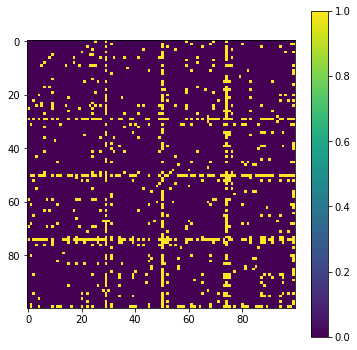

In [2]:
N = 100
R = torch.tensor([8.0]).double()
alpha = torch.tensor([0.7]).double()
T = torch.tensor([0.1]).double()

G = HRG(R=R, alpha=alpha, T=T)
r, theta, A = G.generate(N)
r, theta, A = r.float(), theta.float(), A.float()
G.show()
#G.plot()

### True values

In [3]:
hrg_likelihood(A, r, theta, R, T, alpha, debug=False)

-4024.6463001186053

In [4]:
hrg_likelihood(A, r, theta, R, T, torch.tensor([0.2]), debug=False)

-3967.8302159855803

In [5]:
Rs = torch.arange(0.5, 10.5, 0.5)
Ts = torch.arange(0.05, 1.05, 0.05)
alphas = torch.arange(.1, 2.1, .1)

In [6]:
lh_a = []
for a in alphas:
    lh_ =[]
    for R_ in Rs:
        lh__ = []
        for T_ in Ts:
            lh__.append(hrg_L(A, r, theta, R_, T_, a, debug=False))
        lh_.append(lh__)
    lh_a.append(lh_)

In [15]:
lh_a = np.array(lh_a)
lh_clampd = torch.clamp(torch.tensor(lh_a), min=-4500)

In [16]:
#np.save('paramsearch_n1000_R8_T01_a07.npy', lh_a)

In [17]:
levels = [-1960, -1980, -2000, -2500, -3000, -3500, -4000, -5000, -6000, -10000]

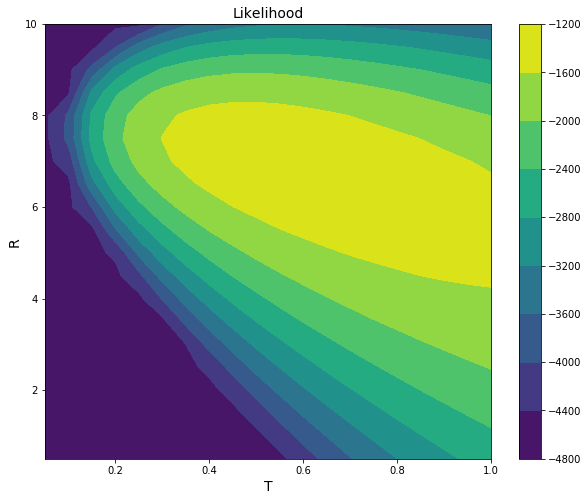

In [18]:
plt.figure(figsize=(10,8))
plt.contourf(Ts.numpy(), Rs.numpy(), lh_clampd[2])
plt.title('Likelihood', fontsize=14)
plt.xlabel('T', fontsize=14)
plt.ylabel('R', fontsize=14)
plt.colorbar()
plt.show()

In [19]:
max_index = np.unravel_index(lh_a.argmax(), lh_a.shape)
a_max = alphas[max_index[0]].item()
R_max = Rs[max_index[1]].item()
T_max = Ts[max_index[2]].item()
a_max, R_max, T_max

(0.10000000149011612, 7.0, 0.550000011920929)

In [20]:
max_index

(0, 13, 10)

In [21]:
lh_clampd.max(), lh_clampd[max_index]

(tensor(-1318.2421, dtype=torch.float64),
 tensor(-1318.2421, dtype=torch.float64))

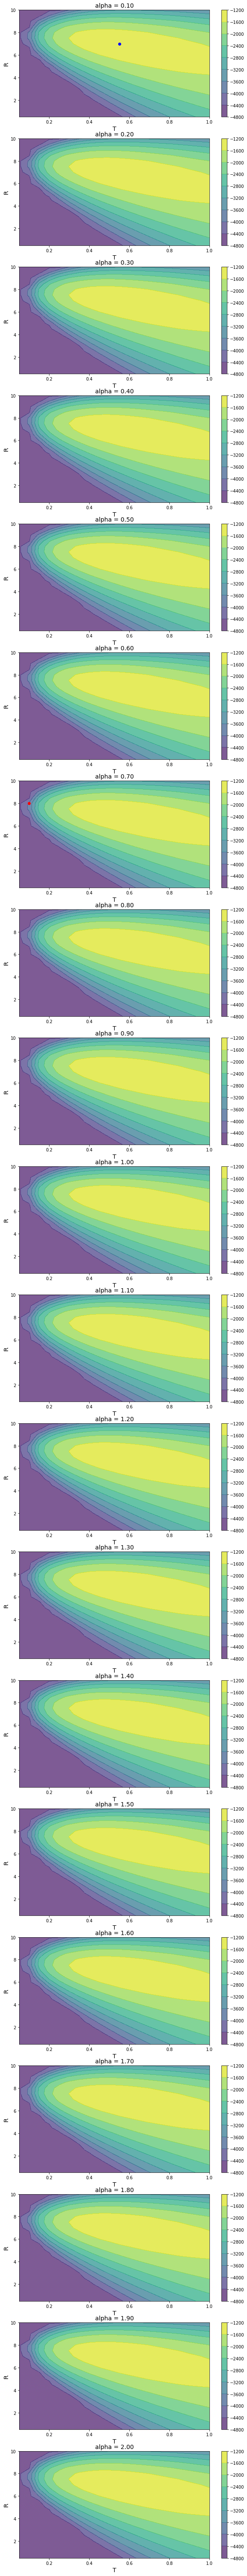

In [22]:
fig, axs = plt.subplots(len(alphas),1, figsize=(10, 110))
#fig.subplots_adjust(hspace = .5, wspace=.05)
#axs = axs.ravel()
#fig.suptitle(title, size=24)
    
for i in range(len(alphas)):
    im = axs[i].contourf(Ts.numpy(), Rs.numpy(), lh_clampd[i], alpha=0.7)
    if alphas[i].item()==alpha:
        axs[i].scatter(T.numpy(), R.numpy(), color='red')
    if alphas[i].item()==a_max:
        axs[i].scatter(T_max, R_max, color='blue')
    axs[i].set_title(str('alpha = %.2f' %  alphas[i].item()), fontsize=14)
    axs[i].set_xlabel('T', fontsize=14)
    axs[i].set_ylabel('R', fontsize=14)
    
    fig.colorbar(im, ax=axs[i])

plt.show()

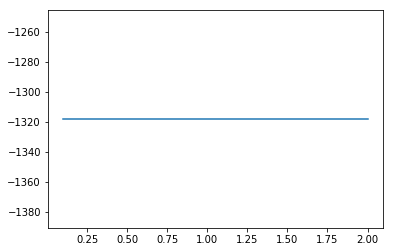

In [23]:
plt.plot(alphas, lh_a[:,max_index[1],max_index[2]])
plt.show()